# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="images/ml101-6-step-ml-framework.png" width=500/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

import time
print(f"Last Updated: {time.asctime()}")


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Last Updated: Sat Feb 24 05:25:54 2024


## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file. You'll likely use this a lot.

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your **data dictionary** and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

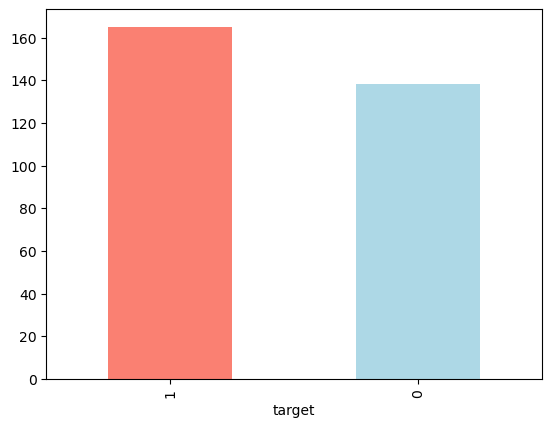

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the sex column. 

Remember from our data dictionary, for the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


What can we infer from this? Let's make a simple heuristic.

Since there are about 100 women and 72 of them have a postive value of heart disease being present, we might infer, based on this one variable if the participant is a woman, there's a 75% chance she has heart disease.

As for males, there's about 200 total with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time he will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

This can be our very simple **baseline**, we'll try to beat it with machine learning.

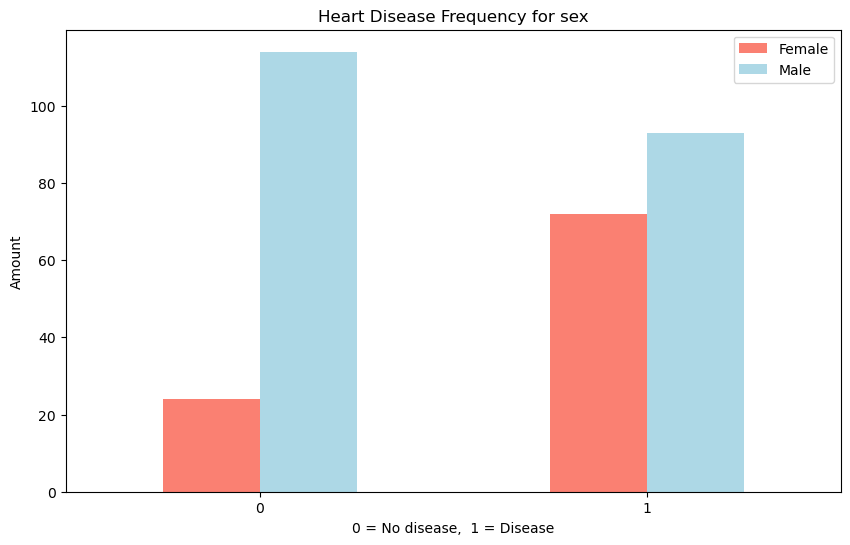

In [12]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease,  1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

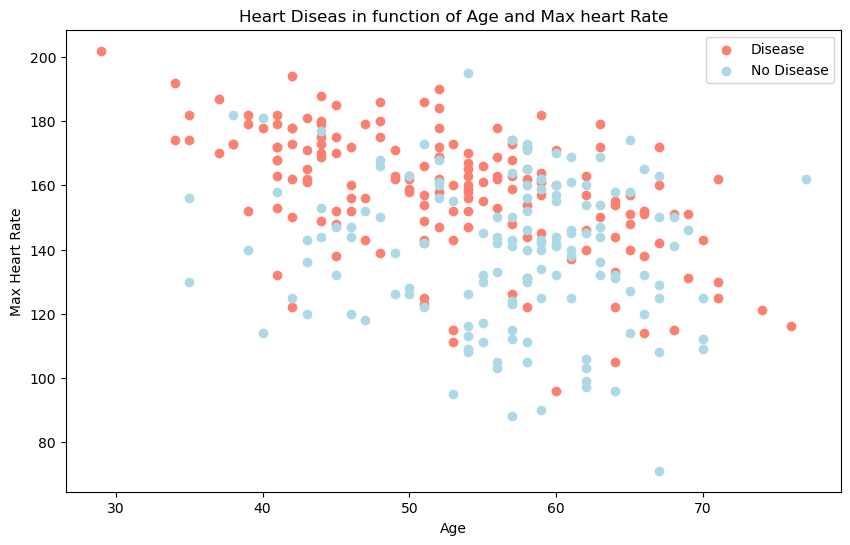

In [13]:
# Create another figure
plt.figure(figsize=(10, 6))

# Start with positve examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon"); # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue"); # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Diseas in function of Age and Max heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

Let's check the age **distribution**.

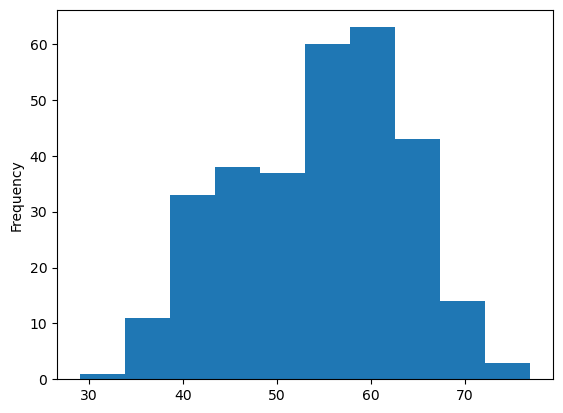

In [14]:
df["age"].plot.hist();

We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which reflects in the scatter plot above.

Let's keep going.

### Heart Disease Frequency per Chest Pain Type

Let's try another independent variable. This time, `cp` (chest pain).

We'll use the same process as we did before with `sex`.

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


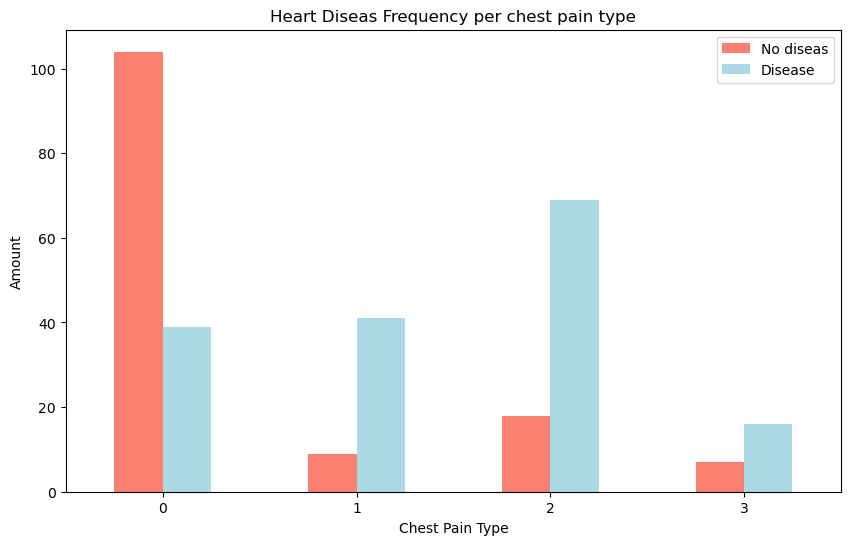

In [16]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Diseas Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No diseas", "Disease"])
plt.xticks(rotation=0);

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


What can we infer from this?

Remember from our data dictionary what the different levels of chest pain are.

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
    
It's interesting the atypical agina (value 1) states it's not related to the heart but seems to have a higher ratio of participants with heart disease than not.

Wait...?

What does atypical agina even mean?

At this point, it's important to remember, if your data dictionary doesn't supply you enough information, you may want to do further research on your values. This research may come in the form of asking a **subject matter expert** (such as a cardiologist or the person who gave you the data) or Googling to find out more.

According to PubMed, it seems [even some medical professionals are confused by the term](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/).

> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

Although not conclusive, this graph above is a hint at the confusion of defintions being represented in data.

### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


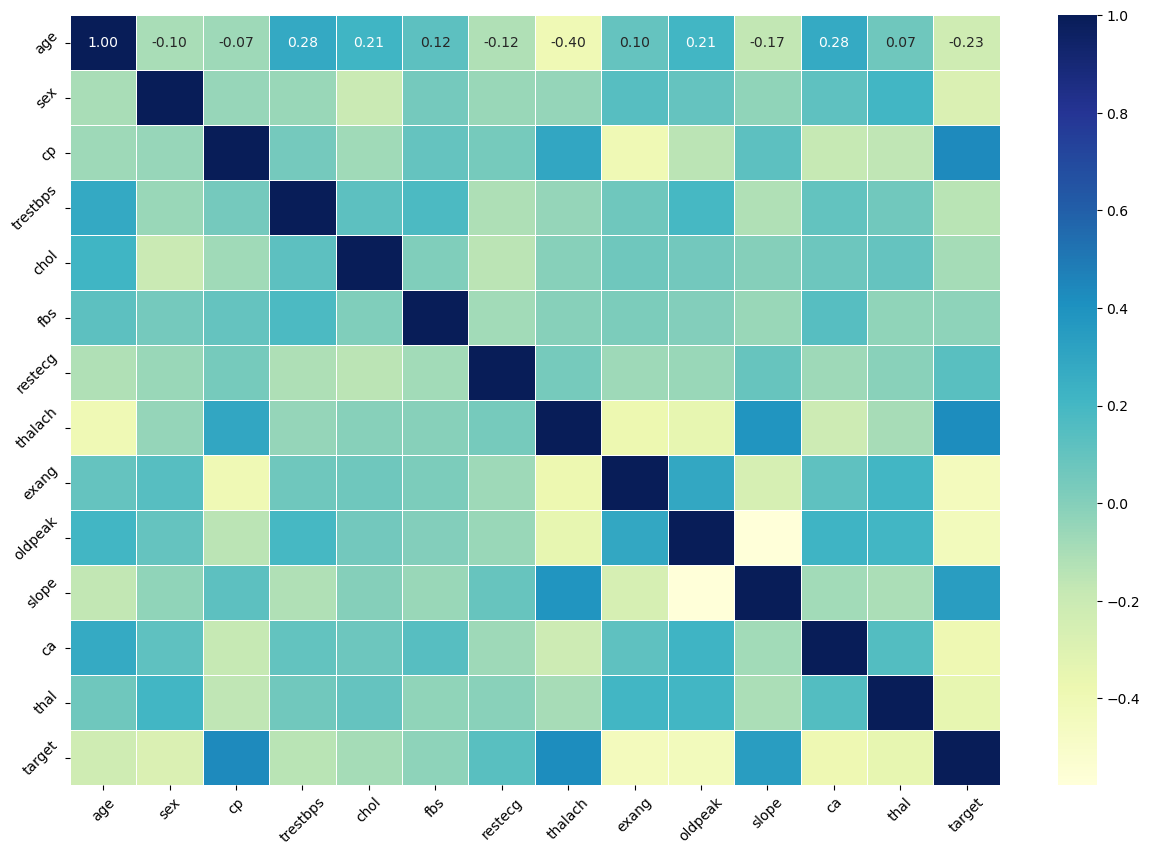

In [19]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

plt.xticks(rotation=45);
plt.yticks(rotation=45);

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

### Enough EDA, let's model

Remember, we do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using `sex`, the rest of the data seems to be pretty distributed.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

A few extra things to remember:

* Not every EDA will look the same, what we've seen here is an example of what you could do for structured, tabular dataset.
* You don't necessarily have to do the same plots as we've done here, there are many more ways to visualize data, I encourage you to look at more.
* We want to quickly find:
    * Distributions (`df.column.hist()`)
    * Missing values (`df.info()`)
    * Outliers

Let's build some models.

---

## 5. Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Everything except target variable
X = df.drop("target", axis=1)

# Target variable
y = df["target"]

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

In [24]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # X ndependent variables, Y dependent variable and percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems, you could also use a validation (train/validation/test) set or cross-validation (we'll see this in a second).

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

Let's look at our training data.

In [25]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [26]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

#### Why these?

If we look at the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html), we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

| <img src="images/sklearn-ml-map-cheatsheet-heart-disease-ensemble.png" alt="an example classification path using the Scikit-Learn machine learning model map" width=500/> | 
|:--:| 
| An example path we can take using the Scikit-Learn Machine Learning Map |

"Wait, I don't see Logistic Regression and why not use LinearSVC?"

Good questions. 

I was confused too when I didn't see Logistic Regression listed as well because when you read the Scikit-Learn documentation on it, you can see it's [a model for classification](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression).

And as for LinearSVC, let's pretend we've tried it, and it doesn't work, so we're following other options in the map.

For now, knowing each of these algorithms inside and out is not essential.

Machine learning and data science is an iterative practice. These algorithms are tools in your toolbox.

In the beginning, on your way to becoming a practioner, it's more important to understand your problem (such as, classification versus regression) and then knowing what tools you can use to solve it.

Since our dataset is relatively small, we can experiment to find algorithm performs best.

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, `model.fit(X_train, y_train)` and for scoring a model `model.score(X_test, y_test)`. `score()` returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a which fits and scores them.

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Set random seed
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

/Users/jonatha/Desktop/Projetos/heart-disease-project-ml/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Beautiful! Since our models are fitting, let's compare them visually.

## Model Comparison

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

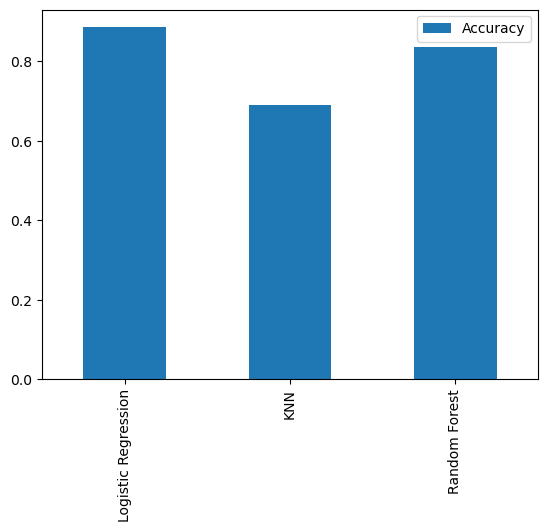

In [34]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

Beautiful! We can't really see it from the graph but looking at the dictionary, the [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model performs best.

Since you've found the best model. Let's take it to the boss and show her what we've found.

> **You:** I've found it!

> **Her:** Nice one! What did you find?
    
> **You:** The best algorithm for prediting heart disease is a LogisticRegrssion!

> **Her:** Excellent. I'm surprised the hyperparameter tuning is finished by now.

> **You:** *wonders what **hyperparameter tuning** is*
    
> **You:** Ummm yeah, me too, it went pretty quick.
    
> **Her:** I'm very proud, how about you put together a **classification report** to show the team, and be sure to include a **confusion matrix**, and the **cross-validated precision**, **recall** and **F1 scores**. I'd also be curious to see what **features are most important**. Oh and don't forget to include a **ROC curve**.
    
> **You:** *asks self, "what are those???"*
    
> **You:** Of course! I'll have to you by tomorrow.


Alright, there were a few words in there which could sound made up to someone who's not a budding data scientist like yourself. But being the budding data scientist you are, you know data scientists make up words all the time.

Let's briefly go through each before we see them in action.

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## Hyperparameter tuning and cross-validation

To cook your favourite dish, you know to set the oven to 180 degrees and turn the grill on. But when your roommate cooks their favourite dish, they set use 200 degrees and the fan-forced mode. Same oven, different settings, different outcomes.

The same can be done for machine learning algorithms. You can use the same algorithms but change the settings (hyperparameters) and get different results.

But just like turning the oven up too high can burn your food, the same can happen for machine learning algorithms. You change the settings and it works so well, it **overfits** (does too well) the data.

We're looking for the goldilocks model. One which does well on our dataset but also does well on unseen examples.

To test different hyperparameters, you could use a **validation set** but since we don't have much data, we'll use **cross-validation**.

The most common type of cross-validation is *k-fold*. It involves splitting your data into *k-fold's* and then testing a model on each. For example, let's say we had 5 folds (k = 5). This what it might look like.

| <img src="images/sklearn-cross-validation.png" width=500/> | 
|:--:| 
| Normal train and test split versus 5-fold cross-validation |

We'll be using this setup to tune the hyperparameters of some of our models and then evaluate them. We'll also get a few more metrics like **precision**, **recall**, **F1-score** and **ROC** at the same time.

Here's the game plan:
1. Tune model hyperparameters, see which performs best
2. Perform cross-validation
3. Plot ROC curves
4. Make a confusion matrix
5. Get precision, recall and F1-score metrics
6. Find the most important model features

### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (`n_neigbors=5`).

What are neighbours?

Imagine all our different samples on one graph like the scatter graph we have above. KNN works by assuming dots which are closer together belong to the same class. If `n_neighbors=5` then it assume a dot with the 5 closest dots around it are in the same class.

We've left out some details here like what defines close or how distance is calculated but I encourage you to research them.

For now, let's try a few different values of `n_neighbors`.

In [35]:
# Create a list of train scores
train_scores = []
# Create a list of test scores
test_scores = []
# Create a list of different values for n_neighbors
neighbors = range(1, 21)# 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors=i) # set neighbors value

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


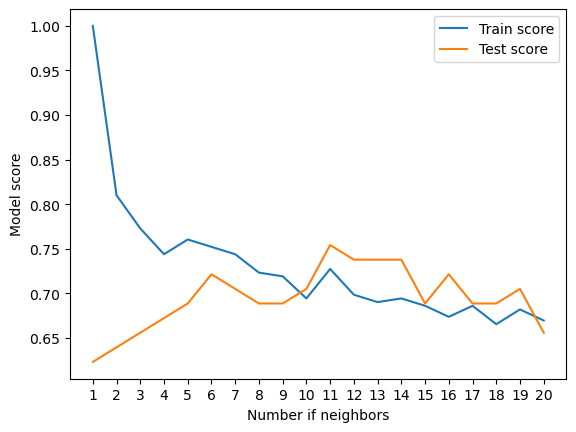

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number if neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, `n_neighbors = 11` seems best.

Even knowing this, the `KNN`'s model performance didn't get near what `LogisticRegression` or the `RandomForestClassifier` did.

Because of this, we'll discard `KNN` and focus on the other two.

We've tuned `KNN` by hand but let's see how we can `LogisticsRegression` and `RandomForestClassifier` using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

Instead of us having to manually try different hyperparameters by hand, `RandomizedSearchCV` tries a number of different combinations, evaluates them and saves the best.

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Reading the Scikit-Learn documentation for [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV), we find there's a number of different hyperparameters we can tune.

The same for [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [55]:
# Different LogisticRegression hyperparameters
log_red_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50), "max_depth": [None, 3, 5, 10], "min_samples_split": np.arange(2, 20, 2), "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [48]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_red_grid, cv=5, n_iter=20, verbose=True)
# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [49]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [50]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [56]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [58]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

Excellent! Tuning the hyperparameters for each model saw a slight performance boost in both the `RandomForestClassifier` and `LogisticRegression`.

This is akin to tuning the settings on your oven and getting it to cook your favourite dish just right.

But since `LogisticRegression` is pulling out in front, we'll try tuning it further with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

The difference between `RandomizedSearchCV` and `GridSearchCV` is where `RandomizedSearchCV` searches over a grid of hyperparameters performing `n_iter` combinations, `GridSearchCV` will test every single possible combination.

In short:
* `RandomizedSearchCV` - tries `n_iter` combinations of hyperparameters and saves the best.
* `GridSearchCV` - tries every single combination of hyperparameters and saves the best.

Let's see it in action.